In [18]:
import warnings
warnings.simplefilter("ignore")

# Essential imports for data analysis for visualization 
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
import cufflinks as cf
cf.go_offline()

# Setting style and inline plotting
sns.set_style('whitegrid')
%matplotlib inline

In [19]:
rbc = pd.read_csv('RBC.csv',index_col='Date') # Royal Bank of Canada
cibc = pd.read_csv('CIBC.csv',index_col='Date') # Canadian Imperial Bank of Commerce
bmo = pd.read_csv('BMO.csv',index_col='Date') # Bank of Montreal 
suncor = pd.read_csv('Suncor.csv',index_col='Date') # Suncor Energy Inc.
encana = pd.read_csv('Encana.csv',index_col='Date' ) # Encana Corp.
cnq = pd.read_csv('CNQ.csv',index_col='Date' ) # Canadian Natural Resource Ltd.
uso = pd.read_csv('USO.csv',index_col='Date') # United States Oil Fund LP (ETF)
wti = pd.read_csv('WTI.csv',index_col='Date') # WTI Oil price

In [5]:
cnq.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,24.81,25.62,24.81,25.48,2674000
2006-01-04,25.44,26.49,25.20,26.44,2312200
2006-01-05,26.18,26.22,25.58,25.72,1878600
2006-01-06,26.00,26.26,25.80,26.00,1391600
2006-01-09,26.00,26.34,25.77,26.16,1510800


In [6]:
cnq.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,32.35,32.53,32.11,32.16,1672472
2016-12-27,32.21,32.25,31.73,31.99,2724599
2016-12-28,32.06,32.34,31.94,32.21,2160914
2016-12-29,32.15,32.34,31.90,31.97,1566189
2016-12-30,32.08,32.33,31.78,31.88,1163683


In [7]:
#Tickers for the dataset
tickers = ['RBC', 'CIBC', 'BMO', 'Suncor', 'Encana','CNQ']

#Joining data
bo = pd.concat([rbc, cibc, bmo, suncor, encana, cnq], axis=1, keys=tickers)

# Let's see how the data look like
bo.head()

RBC                                CIBC                       \
             Open   High    Low  Close  Volume   Open   High    Low  Close   
Date                                                                         
2006-01-03  38.90  39.75  38.83  39.59  346000  65.61  67.25  65.61  66.98   
2006-01-04  39.74  40.36  39.69  40.34  382200  67.39  67.94  67.20  67.94   
2006-01-05  39.90  39.90  39.40  39.48  261200  67.39  67.75  67.24  67.47   
2006-01-06  39.50  39.59  39.24  39.28  189600  67.57  67.80  67.34  67.74   
2006-01-09  39.02  39.32  38.70  39.00  197200  67.07  67.88  66.98  67.63   

                    ...    Encana                                  CNQ         \
           Volume   ...      Open   High    Low  Close   Volume   Open   High   
Date                ...                                                         
2006-01-03  49400   ...     45.40  46.86  45.37  46.70  3852900  24.81  25.62   
2006-01-04  30000   ...     46.10  46.39  45.49  46.30  3926300  25.44  26.49   
2006-01-05  61200   ...     45.75  45.88  44.77  45.22  3941700  26.18  26.22   
2006-01-06  36300   ...     45.83  46.18  45.50  45.86  2786900  26.00  26.26   
2006-01-09  37900   ...     45.95  45.99  45.01  45.05  2878100  26.00  26.34   

                                   
              Low  Close   Volume  
Date                               
2006-01-03  24.81  25.48  2674000  
2006-01-04  25.20  26.44  2312200  
2006-01-05  25.58  25.72  1878600  
2006-01-06  25.80  26.00  1391600  
2006-01-09  25.77  26.16  1510800  

[5 rows x 30 columns]

In [9]:
bo.columns.names

FrozenList(['Entity', 'Stock'])

In [8]:
bo.columns.names = ['Entity','Stock']
bo.columns.names 

FrozenList(['Entity', 'Stock'])

In [10]:
bo.head()

Entity        RBC                                CIBC                       \
Stock        Open   High    Low  Close  Volume   Open   High    Low  Close   
Date                                                                         
2006-01-03  38.90  39.75  38.83  39.59  346000  65.61  67.25  65.61  66.98   
2006-01-04  39.74  40.36  39.69  40.34  382200  67.39  67.94  67.20  67.94   
2006-01-05  39.90  39.90  39.40  39.48  261200  67.39  67.75  67.24  67.47   
2006-01-06  39.50  39.59  39.24  39.28  189600  67.57  67.80  67.34  67.74   
2006-01-09  39.02  39.32  38.70  39.00  197200  67.07  67.88  66.98  67.63   

Entity              ...    Encana                                  CNQ         \
Stock      Volume   ...      Open   High    Low  Close   Volume   Open   High   
Date                ...                                                         
2006-01-03  49400   ...     45.40  46.86  45.37  46.70  3852900  24.81  25.62   
2006-01-04  30000   ...     46.10  46.39  45.49  46.30  3926300  25.44  26.49   
2006-01-05  61200   ...     45.75  45.88  44.77  45.22  3941700  26.18  26.22   
2006-01-06  36300   ...     45.83  46.18  45.50  45.86  2786900  26.00  26.26   
2006-01-09  37900   ...     45.95  45.99  45.01  45.05  2878100  26.00  26.34   

Entity                             
Stock         Low  Close   Volume  
Date                               
2006-01-03  24.81  25.48  2674000  
2006-01-04  25.20  26.44  2312200  
2006-01-05  25.58  25.72  1878600  
2006-01-06  25.80  26.00  1391600  
2006-01-09  25.77  26.16  1510800  

[5 rows x 30 columns]

In [11]:
# Max close price
max_stock = bo.xs(key='Close',axis=1,level='Stock').max()
max_stock

Entity
RBC        75.90
CIBC      108.24
BMO        78.03
Suncor     72.95
Encana     96.89
CNQ        53.70
dtype: float64

In [12]:
# min close price
min_stock = bo.xs(key='Close',axis=1,level='Stock').min()
min_stock

Entity
RBC       20.62
CIBC      28.39
BMO       19.51
Suncor    14.66
Encana     3.01
CNQ       13.49
dtype: float64

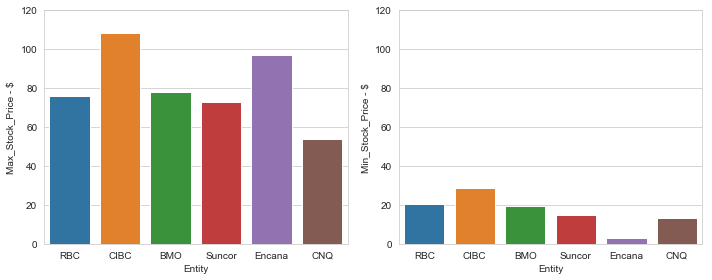

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
sns.barplot(max_stock.index, max_stock.values, ax=axes[0])
axes[0].set_ylim(0,120)
axes[0].set_ylabel('Max_Stock_Price - $')

sns.barplot(min_stock.index, min_stock.values, ax=axes[1])
axes[1].set_ylim(0,120)
axes[1].set_ylabel('Min_Stock_Price - $')
plt.tight_layout()

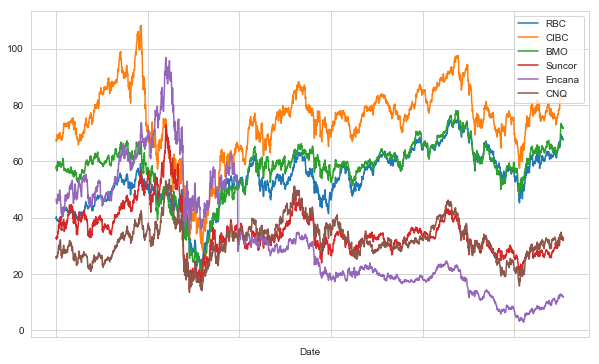

In [17]:
# for loop
for tick in tickers:
    bo[tick]['Close'].plot(figsize=(10,6),label=tick)
plt.legend()

In [16]:
bo.xs(key='Close',axis=1,level='Stock').iplot()

In [14]:
wti.head()

,Value
Date,
2016-12-30,53.75
2016-12-29,53.80
2016-12-28,54.01
2016-12-27,52.82
2016-12-23,52.01


**Set wti column from 'value' to 'Oil Price / Barrel' and display the head of the dataframe**

In [15]:
wti.columns = ['Oil Price / Barrel']
wti.head()

,Oil Price / Barrel
Date,
2016-12-30,53.75
2016-12-29,53.80
2016-12-28,54.01
2016-12-27,52.82
2016-12-23,52.01


**All stock went down between 2008 and 2009, Check the oil price and US oil fund stock, how did they change?** Hint: `plt.subplots()`

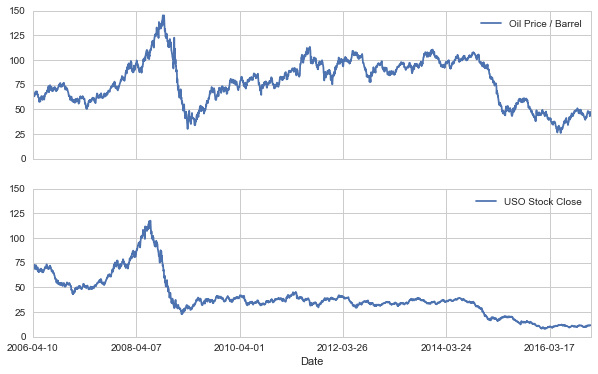

In [16]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 6), sharex=True)
wti[::-1].plot(ax=axes[0],ylim=(0,150))
uso['Close'].plot(ax=axes[1],ylim=(0,150), label = 'USO Stock Close')
plt.legend()

In [17]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = bo[tick]['Close'].pct_change()
returns.head()

,RBC Return,CIBC Return,BMO Return,Suncor Return,Encana Return,CNQ Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.018944,0.014333,0.019389,0.010073,-0.008565,0.037677
2006-01-05,-0.021319,-0.006918,-0.014736,-0.023874,-0.023326,-0.027231
2006-01-06,-0.005066,0.004002,-0.005913,0.031269,0.014153,0.010886
2006-01-09,-0.007128,-0.001624,-0.008572,-0.012309,-0.017662,0.006154


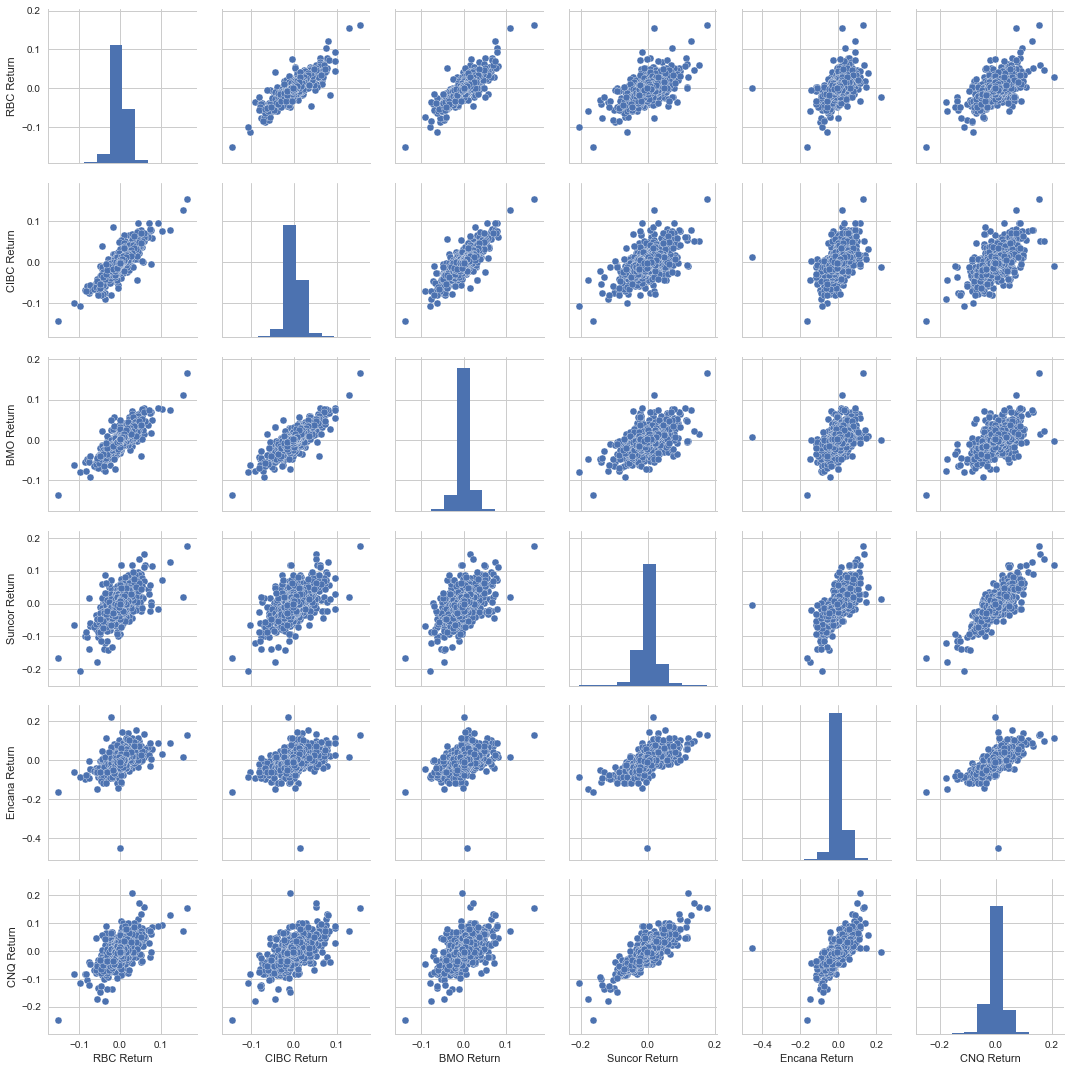

In [18]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:]) # avoiding NaN row

In [19]:
# Best Single day gain
returns.idxmax()

RBC Return       2008-10-13
CIBC Return      2008-10-13
BMO Return       2008-10-13
Suncor Return    2008-10-13
Encana Return    2016-02-24
CNQ Return       2008-11-21
dtype: object

In [20]:
# Worst single day drop 
returns.idxmin()

RBC Return       2008-11-20
CIBC Return      2008-11-20
BMO Return       2008-11-20
Suncor Return    2009-01-20
Encana Return    2009-12-09
CNQ Return       2008-11-20
dtype: object

In [21]:
returns.std() # Encana is the riskiest

RBC Return       0.017404
CIBC Return      0.018244
BMO Return       0.016974
Suncor Return    0.026503
Encana Return    0.029234
CNQ Return       0.028247
dtype: float64

In [22]:
#let's use .ix[] here to get the slice for the selected dates
returns.ix['2008-01-01':'2008-12-30'].std() # CNQ was the risk in 2008
#returns.loc['2008-01-01':'2008-12-30'].std() # CNQ was the risk in 2008

RBC Return       0.031713
CIBC Return      0.036268
BMO Return       0.031502
Suncor Return    0.049237
Encana Return    0.040976
CNQ Return       0.054149
dtype: float64

In [23]:
returns.ix['2016-01-01':'2016-12-30'].std() # Ecnana could not hold, very risky in 2016!
#returns.loc['2016-01-01':'2016-12-30'].std() # Ecnana could not hold, very risky in 2016!

RBC Return       0.013636
CIBC Return      0.013055
BMO Return       0.012131
Suncor Return    0.020997
Encana Return    0.046978
CNQ Return       0.027645
dtype: float64

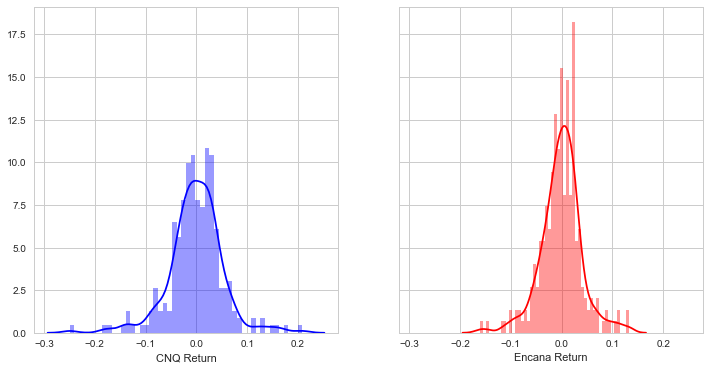

In [24]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)
sns.distplot(returns.ix['2008-01-01':'2008-12-30']['Encana Return'],
             color='red',bins=50, ax=axes[1])
sns.distplot(returns.ix['2008-01-01':'2008-12-30']['CNQ Return'], 
             color='blue',bins=50, ax=axes[0])

In [25]:
cnq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2006-01-03 to 2016-12-30
Data columns (total 5 columns):
Open      2769 non-null float64
High      2769 non-null float64
Low       2769 non-null float64
Close     2769 non-null float64
Volume    2769 non-null int64
dtypes: float64(4), int64(1)
memory usage: 129.8+ KB


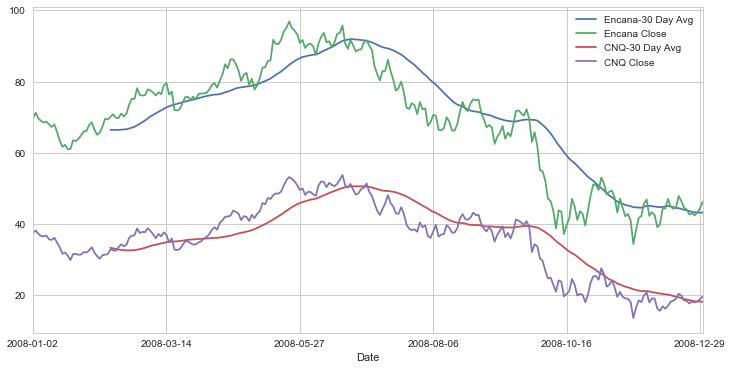

In [26]:
plt.figure(figsize=(12,6))
encana['Close'].ix['2008-01-01':'2008-12-30'].rolling(window=30).mean().plot(label='Encana-30 Day Avg')
encana['Close'].ix['2008-01-01':'2008-12-30'].plot(label='Encana Close')
cnq['Close'].ix['2008-01-01':'2008-12-30'].rolling(window=30).mean().plot(label='CNQ-30 Day Avg')
cnq['Close'].ix['2008-01-01':'2008-12-30'].plot(label='CNQ Close')
plt.legend()

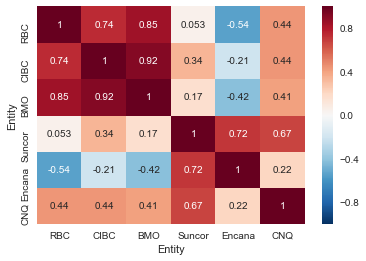

In [27]:
sns.heatmap(bo.xs(key='Close',axis=1,level='Stock').corr(),annot=True)

In [28]:
close_corr = bo.xs(key='Close',axis=1,level='Stock').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

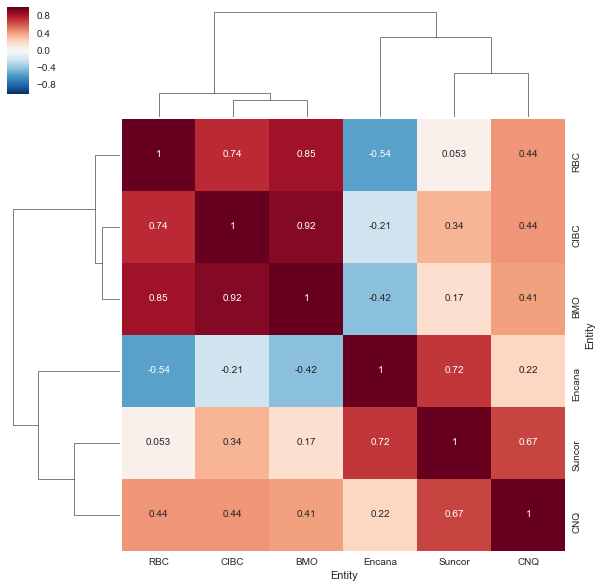

In [29]:
sns.clustermap(bo.xs(key='Close',axis=1,level='Stock').corr(),annot=True)

In [20]:
encana[['Open', 'High', 'Low', 'Close']].ix['2008-01-01':'2008-12-31'].iplot(kind='candle')

In [21]:
encana['Close'].ix['2015-01-01':'2015-12-31'].ta_plot(
    study='sma',periods=[10,30,50],title='Simple Moving Averages')

In [22]:
encana['Close'].ix['2015-01-01':'2015-12-31'].ta_plot(study='boll')